## Exercise 9

### (a)

The primal problem is given as:
$ min_{w \in \mathbb(R)^d, \epsilon \in \mathbb(R)^n} \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i$, subject to: $Y_i (\langle w, X_i \rangle ) \geq 1-\epsilon , \epsilon_i \geq 0$.

The problem can be reformulated to $min \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i max(0, Y_i (\langle w, X_i \rangle ))$.

Now take the derivative:
\begin{align}
& \nabla_w \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i + \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle w, X_i \rangle ) - \sum_i \beta_i \epsilon_i \\
&= w - \sum_i \alpha_i Y_i X_i\\
& \Rightarrow w=\sum_i \alpha_i Y_i X_i
\end{align}

\begin{align}
& \frac{\partial}{\partial \epsilon_i} \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i + \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle w, X_i \rangle ) - \sum_i \beta_i \epsilon_i\\
& = \frac{C}{n} + \alpha_i - \beta_i \\
\end{align}

By setting the gradient of $\epsilon$ to 0 we can use this equation to get rid of beta, as $\beta_i = \frac{C}{n} + \alpha_i$, this imposed the constrain $\alpha_i < \frac{C}{n} $ due to the positivity of $\beta$.

No substitution in $L$ we get:
\begin{align}
& \frac{1}{2} \Vert \sum_i \alpha_i Y_i X_i \Vert^2 + \frac{C}{n} \sum_i \epsilon_i \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle \sum_i \alpha_i Y_i X_i, X_i \rangle ) - \sum_i (\frac{C}{n} + \alpha_i) \epsilon_i\\
&= \frac{1}{2} \Vert \sum_i \alpha_i Y_i X_i \Vert^2 + \sum_i \alpha_i (1  - Y_i \langle \sum_i \alpha_i Y_i X_i, X_i \rangle ) 
\end{align}


TODO: continue same as normal lagrangian

### (b)

1.
The derivative is given by:
\begin{align}
\frac{\partial}{\partial \alpha_r} \Psi(..., \alpha_r, ...)
&= \frac{\partial}{\partial \alpha_r} \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j Y_i Y_j \langle x_i, x_j \rangle \\
&=  1 - \frac{\partial}{\partial \alpha_r} \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j Y_i Y_j \langle x_i, x_j \rangle \\
&=  1 - \alpha_r Y_r^2 \langle x_r, x_r \rangle - \frac{\partial}{\partial \alpha_r} \frac{1}{2} \sum_{i,j\neq i} \alpha_i \alpha_j Y_i Y_j \langle x_i, x_j \rangle \\
&=  1 - \alpha_r Y_r^2 \langle x_r, x_r \rangle -  \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle \\
\end{align}

Set to 0:

\begin{align}
\alpha_r Y_r^2 \langle x_r, x_r \rangle &= 1 - \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle\\
\alpha_r  &= 1 - \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle / Y_r^2 \langle x_r, x_r \rangle\\
\end{align}


If $ 1 - \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle < 0 \Rightarrow \alpha_r < 0$, as problem concave, best solution is given by 0. Similarly other way round


2.


In [9]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist


In [16]:
def CoordinateDescentSVM(Xtrain, Ytrain, C, Xtest, Ytest):
    ''' compute the solution of linear SVM
    Xtrain, Ytrain: training set
    Xtest, Ytest: test set (only to monitor test error)
    C: error parameter

    w: weights linear SVM
    TrainError, TestError: training and test errors over iterations
    '''
    n = Xtrain.shape[0]
    alpha = np.zeros([n, 1]) # initialize dual variables
    w = Xtrain.T @ (Ytrain * alpha) # initialize primal variables

    counter = 0
    converged = False
    eps = 1e-3
    TrainError, TestError = [], []
    
    indices = np.array(list(range(n)))
    # print(np.where(indices!=1))

    while not converged:
        # select coordinate to update
        r = counter % n

        r_index = np.where(indices!=r)

        alpha_r = (1- alpha[r]* Xtrain[r,:] @ Xtrain[r,:] - 0.5 * np.sum(alpha[r_index] * Ytrain[r_index] * Ytrain[r] * np.expand_dims(np.squeeze(Xtrain[r_index, :]) @ Xtrain[r, :].T, axis=1)))#/(Xtrain[:,r] @ Xtrain[:,r])
        # solve the subproblem for coordinate r without any constraints
        # alpha_r = (1 - np.sum([alpha[index] * Ytrain[index] * Ytrain[r] * (Xtrain[:,index].T @ Xtrain[:,r]) for index in indices[indices!=r]]))/(Xtrain[:,r].T @ Xtrain[:,r])

        # project the solution to the interval [0, C / n]
        alpha[r] = np.maximum(0.0, np.minimum(alpha_r, C/n))

        # monitor the progress of the method computing the dual
        # objective DualObj

        if (counter + 1) % 100 == 0:
            DualObj = np.sum(alpha) - 0.5 * np.sum(np.outer(alpha, alpha) * np.outer(Ytrain, Ytrain) * cdist(Xtrain, Xtrain, lambda a,b: a.T @ b))
            print('iteration={} dual obj={:.3f}'.format(
                counter + 1, DualObj))

        # compute the training and test error with the current iterate alpha
        w = np.expand_dims(np.sum(alpha * Ytrain * Xtrain,   axis=0), axis=1)
        TrainError.append(np.sum(np.sign(Xtrain @ w) != Ytrain)/n)
        TestError.append(np.sum(np.sign(Xtest @ w) != Ytest)/Xtest.shape[0])
        #print(f"Train accuracy in epoch {counter + 1}: {TrainError}")

        # if the KKT conditions are satisfied up to the tolerance eps by the
        # the current iterate alpha then set converged = True
        converged = np.all(Ytrain *(Xtrain @ w) > 1-eps)
        counter += 1

        if counter >300:
            converged = True
        
    # compute the primal solution w from alpha
    # FILL IN

    # show final dual objective
    print('final iteration={} dual obj={:.3f}'.format(counter, DualObj))

    return w, TrainError, TestError



In [2]:
data = np.load("digits01.npy", allow_pickle=True).item()
X_train = data["Xtrain"]
Y_train = data["Ytrain"]
X_test = data["Xtest"]
Y_test = data["Ytest"]

iteration=100 dual obj=0.499
iteration=200 dual obj=0.998
iteration=300 dual obj=1.495
final iteration=301 dual obj=1.495
iteration=100 dual obj=4.940
iteration=200 dual obj=9.772
iteration=300 dual obj=14.481
final iteration=301 dual obj=14.481
iteration=100 dual obj=9.761
iteration=200 dual obj=19.087
iteration=300 dual obj=27.926
final iteration=301 dual obj=27.926
iteration=100 dual obj=23.506
iteration=200 dual obj=44.293
iteration=300 dual obj=62.037
final iteration=301 dual obj=62.037


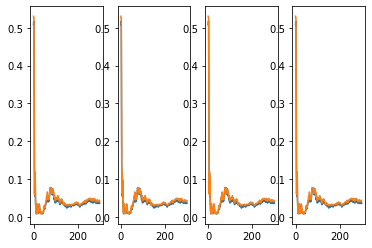

In [35]:
C_list = [10, 100, 200, 500]
fig, axs = plt.subplots(1,4)
for index, C in enumerate(C_list):
    w, train_error, test_error = CoordinateDescentSVM(X_train, Y_train, C,  X_test, Y_test)
    X = list(range(len(train_error)))
    axs[index].plot(X, train_error)
    axs[index].plot(X, test_error)
    axs[index].set_xscale("log")
     